## Collating for real with CollateX

Okay, let's do some serious hands-on collation. Create a new Jupyter notebook (if you don't remember how to do this, [here it is](http://nbviewer.jupyter.org/github/DiXiT-eu/collatex-tutorial/blob/master/unit1/Jupyter_notebook.ipynb) the tutorial) and follow the instructions.

First of all we want to make sure that you have the latest version of CollateX. That's why we do in the Jupyter Notebook:

In [1]:
!pip install --upgrade collatex

Requirement already up-to-date: collatex in /home/espadini/anaconda3/lib/python3.6/site-packages (2.2)


Or directly in the commandline: `pip install --upgrade collatex` (without the exclamation mark at the beginning of the line).

You don't need to do this every time, but make sure you do it regularly. 

Next we need to tell Python that we will be needing the Python library that holds the code for CollateX…

In [2]:
from collatex import *

Now we're ready to make a collation object. We do this with the slightly hermetic line of code: 

    collation = Collation()
    
Here the lower case `collation` is the arbitrary named variable that refers to a copy (officially it is called an *instance*) of the CollateX collation engine. We simply tell the collation library to create a new instance by saying `Collation()`.

In [3]:
collation = Collation()

Now we add some witnesses. Each witness gets a letter or name that will identify them, and for each we add the literal text of the witness to the collation object, like so…

In [4]:
collation.add_plain_witness( "A", "The quick brown fox jumped over the lazy dog.")
collation.add_plain_witness( "B", "The brown fox jumped over the dog." )
collation.add_plain_witness( "C", "The bad fox jumped over the lazy dog." )

And now we can let CollateX do its work of collating these witnesses and sit back for about 0.001 seconds. The result will be an alignment table, so we'll refer to the result with a variable named `alignment_table`.

In [5]:
alignment_table = collate(collation, layout='vertical', segmentation=False )

Well, that worked nicely it seems. But there's no printout, no visualization. That's okay, we can come up with a printout of the alignment table too:

In [6]:
print( alignment_table )

+--------+--------+--------+
|   A    |   B    |   C    |
+--------+--------+--------+
|  The   |  The   |  The   |
+--------+--------+--------+
| quick  |   -    |  bad   |
+--------+--------+--------+
| brown  | brown  |   -    |
+--------+--------+--------+
|  fox   |  fox   |  fox   |
+--------+--------+--------+
| jumped | jumped | jumped |
+--------+--------+--------+
|  over  |  over  |  over  |
+--------+--------+--------+
|  the   |  the   |  the   |
+--------+--------+--------+
|  lazy  |   -    |  lazy  |
+--------+--------+--------+
|  dog   |  dog   |  dog   |
+--------+--------+--------+
|   .    |   .    |   .    |
+--------+--------+--------+


Usually you will want those segments that run parallel to be collected and displayed together. Since this is what most people seem to want, CollateX does that by default. We switched this option off in the example above for a moment because the result then shows you more clearly what the underlying primary structure is that CollateX returns. But for all practicle purposes you will probabably lose that `segmentation=False` option. So, let's get rid of that, and collate again…

In [7]:
alignment_table = collate(collation, layout='vertical' )

In [8]:
print( alignment_table )

+---------------------+---------------------+---------------------+
|          A          |          B          |          C          |
+---------------------+---------------------+---------------------+
|         The         |         The         |         The         |
+---------------------+---------------------+---------------------+
|        quick        |          -          |         bad         |
+---------------------+---------------------+---------------------+
|        brown        |        brown        |          -          |
+---------------------+---------------------+---------------------+
| fox jumped over the | fox jumped over the | fox jumped over the |
+---------------------+---------------------+---------------------+
|         lazy        |          -          |         lazy        |
+---------------------+---------------------+---------------------+
|         dog.        |         dog.        |         dog.        |
+---------------------+---------------------+---

The aligment table visualization is CollateX's default way of rendering a collation result. There are various ways in which one can depict collated results of course. The output in alignment table form can be a good basis for further visualizations. CollateX can also format your collation as a variant graph. This is a visualization that lets you trace from left to right through a directed network, to follow which witness carries what readings.

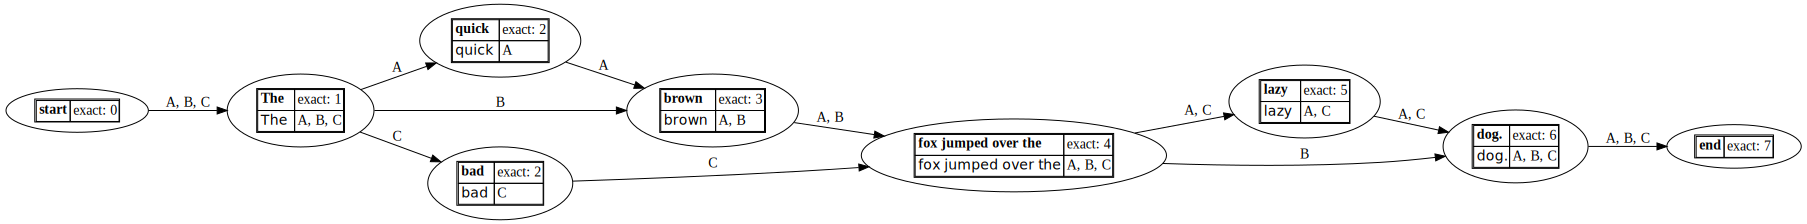

In [9]:
graph = collate( collation, output="svg", segmentation=True )

Okay, that's all good and nice, but that's just tiny fragments—we want decent chunks of text to collate! Well, we can do that too, although it requires a little more work. Specifically for reading in text files from the file system. If we didn't do it that way, we would have to key in all the characters of each witness, and that's just a lot of unnecessary work if we have those texts already in a file. The code below uses the `open` command to open each text file and assign the contents to a variable with an appropriately chosen name.

The `encoding="utf-8"` bit is needed because you should always tell Python which encoding your data uses. This is probably the only place and time where you will use that encoding directive: when you open a (text) file.

In [10]:
collation = Collation()
witness_1859 = open( "../data/Darwin/txt/darwin1859_par1.txt", encoding='utf-8' ).read()
witness_1860 = open( "../data/Darwin/txt/darwin1860_par1.txt", encoding='utf-8' ).read()
witness_1861 = open( "../data/Darwin/txt/darwin1861_par1.txt", encoding='utf-8' ).read()
witness_1866 = open( "../data/Darwin/txt/darwin1866_par1.txt", encoding='utf-8' ).read()
witness_1869 = open( "../data/Darwin/txt/darwin1869_par1.txt", encoding='utf-8' ).read()
witness_1872 = open( "../data/Darwin/txt/darwin1872_par1.txt", encoding='utf-8' ).read()
collation.add_plain_witness( "1859", witness_1859 )
collation.add_plain_witness( "1860", witness_1860 )
collation.add_plain_witness( "1861", witness_1861 )
collation.add_plain_witness( "1866", witness_1866 )
collation.add_plain_witness( "1869", witness_1869 )
collation.add_plain_witness( "1872", witness_1872 )

Now let's check if these witnesses actually contain some text by printing a few of them.

In [11]:
print( witness_1859 )

WHEN we look to the individuals of the same variety or sub-variety of our older cultivated plants and animals, one of the first points which strikes us, is, that they generally differ much more from each other, than do the individuals of any one species or variety in a state of nature. When we reflect on the vast diversity of the plants and animals which have been cultivated, and which have varied during all ages under the most different climates and treatment, I think we are driven to conclude that this greater variability is simply due to our domestic productions having been raised under conditions of life not so uniform as, and somewhat different from, those to which the parent-species have been exposed under nature. There is, also, I think, some probability in the view propounded by Andrew Knight, that this variability may be partly connected with excess of food. It seems pretty clear that organic beings must be exposed during several generations to the new conditions of life to ca

In [12]:
print( witness_1860 )

WHEN we look to the individuals of the same variety or sub-variety of our older cultivated plants and animals, one of the first points which strikes us, is, that they generally differ more from each other than do the individuals of any one species or variety in a state of nature. When we reflect on the vast diversity of the plants and animals which have been cultivated, and which have varied during all ages under the most different climates and treatment, I think we are driven to conclude that this great variability is simply due to our domestic productions having been raised under conditions of life not so uniform as, and somewhat different from, those to which the parent-species have been exposed under nature. There is also, I think, some probability in the view propounded by Andrew Knight, that this variability may be partly connected with excess of food. It seems pretty clear that organic beings must be exposed during several generations to the new conditions of life to cause any a

And now let's collate those witnesses and let's put the result up as an HTML-formatted alignment table…

In [13]:
alignment_table = collate(collation, layout='vertical', output='html')

1859,1860,1861,1866,1869,1872
-,-,-,Causes ofVariability.,Causes ofVariability.,Causes ofVariability.
WHEN we,WHEN we,WHEN we,WHEN we,WHEN we,WHEN we
look to,look to,look to,look to,compare,compare
"the individuals ofthe same variety orsub-variety of ourolder cultivatedplants and animals,one of the firstpoints which strikesus","the individuals ofthe same variety orsub-variety of ourolder cultivatedplants and animals,one of the firstpoints which strikesus","the individuals ofthe same variety orsub-variety of ourolder cultivatedplants and animals,one of the firstpoints which strikesus","the individuals ofthe same variety orsub-variety of ourolder cultivatedplants and animals,one of the firstpoints which strikesus","the individuals ofthe same variety orsub-variety of ourolder cultivatedplants and animals,one of the firstpoints which strikesus","the individuals ofthe same variety orsub-variety of ourolder cultivatedplants and animals,one of the firstpoints which strikesus"
",",",",",",",",-,-
"is, that theygenerally differ","is, that theygenerally differ","is, that theygenerally differ","is, that theygenerally differ","is, that theygenerally differ","is, that theygenerally differ"
much,-,-,-,-,-
more,more,more,more,-,more
from each other,from each other,from each other,from each other,from each other,from each other
",",-,-,-,more,-


Hmm… that is still a little hard to read. Wouldn't it be nice if we got a hint where the actual differences are? Sure, try…

In [14]:
alignment_table = collate(collation, layout='vertical', output='html2')

And finally, we can also generate the variant graph for this collation…

In [15]:
graph = collate( collation, output="svg" )

**Note**: you may have noticed that **if you run the cells in an IPython notebook in order, they know about one another**. For this reason, in the end of this tutorial we could produce different outputs using the information typed into the previous cells. When you open a notebook, remember to run the cells in order or to "run all cells" (from the menu Cell), otherwise you may get an error message.